In [1]:
import torch
import torch.nn as nn
from torch.utils import data
from torchvision.models import vgg19
from torchvision import transforms
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np


import os
import PIL
import numpy as np
import torch
import torch.nn.functional as F
import torchvision.models as models
from torchvision import transforms
from torchvision.utils import make_grid, save_image
from fastai.vision import *


from gradcam.utils import visualize_cam
from gradcam import GradCAM, GradCAMpp

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [97]:
#pneumonia 
img_path = '/sfs/qumulo/qhome/ss9ud/Documents/deeplearningFINAL/chest_xray/chest_xray/test/PNEUMONIA/person133_bacteria_634.jpeg'
img_path1 = '/sfs/qumulo/qhome/ss9ud/Documents/deeplearningFINAL/chest_xray/chest_xray/test/PNEUMONIA/person1_virus_13.jpeg'
img_path2 = '/sfs/qumulo/qhome/ss9ud/Documents/deeplearningFINAL/chest_xray/chest_xray/test/PNEUMONIA/person120_bacteria_573.jpeg'
img_path3 = '/sfs/qumulo/qhome/ss9ud/Documents/deeplearningFINAL/chest_xray/chest_xray/test/PNEUMONIA/person120_bacteria_578.jpeg'
img_path4 = '/sfs/qumulo/qhome/ss9ud/Documents/deeplearningFINAL/chest_xray/chest_xray/test/PNEUMONIA/person121_bacteria_580.jpeg'
img_path5 = '/sfs/qumulo/qhome/ss9ud/Documents/deeplearningFINAL/chest_xray/chest_xray/test/PNEUMONIA/person127_bacteria_603.jpeg'
img_path6 = '/sfs/qumulo/qhome/ss9ud/Documents/deeplearningFINAL/chest_xray/chest_xray/test/PNEUMONIA/person133_bacteria_635.jpeg'
img_path7 = '/sfs/qumulo/qhome/ss9ud/Documents/deeplearningFINAL/chest_xray/chest_xray/test/PNEUMONIA/person133_bacteria_638.jpeg'
img_path8 = '/sfs/qumulo/qhome/ss9ud/Documents/deeplearningFINAL/chest_xray/chest_xray/test/PNEUMONIA/person143_bacteria_687.jpeg'

#normal examples 
img_path9 = '/sfs/qumulo/qhome/ss9ud/Documents/deeplearningFINAL/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0609-0001.jpeg'
img_path10 = '/sfs/qumulo/qhome/ss9ud/Documents/deeplearningFINAL/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0622-0001.jpeg'




In [98]:
#load image 
pil_img = PIL.Image.open(img_path5)

In [99]:
image = pil_img

In [55]:
image.size

(1198, 701)

In [100]:
rgbimg = image.convert('RGB')
#rgbimg = image1.new("RGBA")

In [57]:
num_channel = len(image.split())

In [58]:
print(num_channel)

1


In [59]:
num_channel = len(rgbimg.split())

In [60]:
print(num_channel)

3


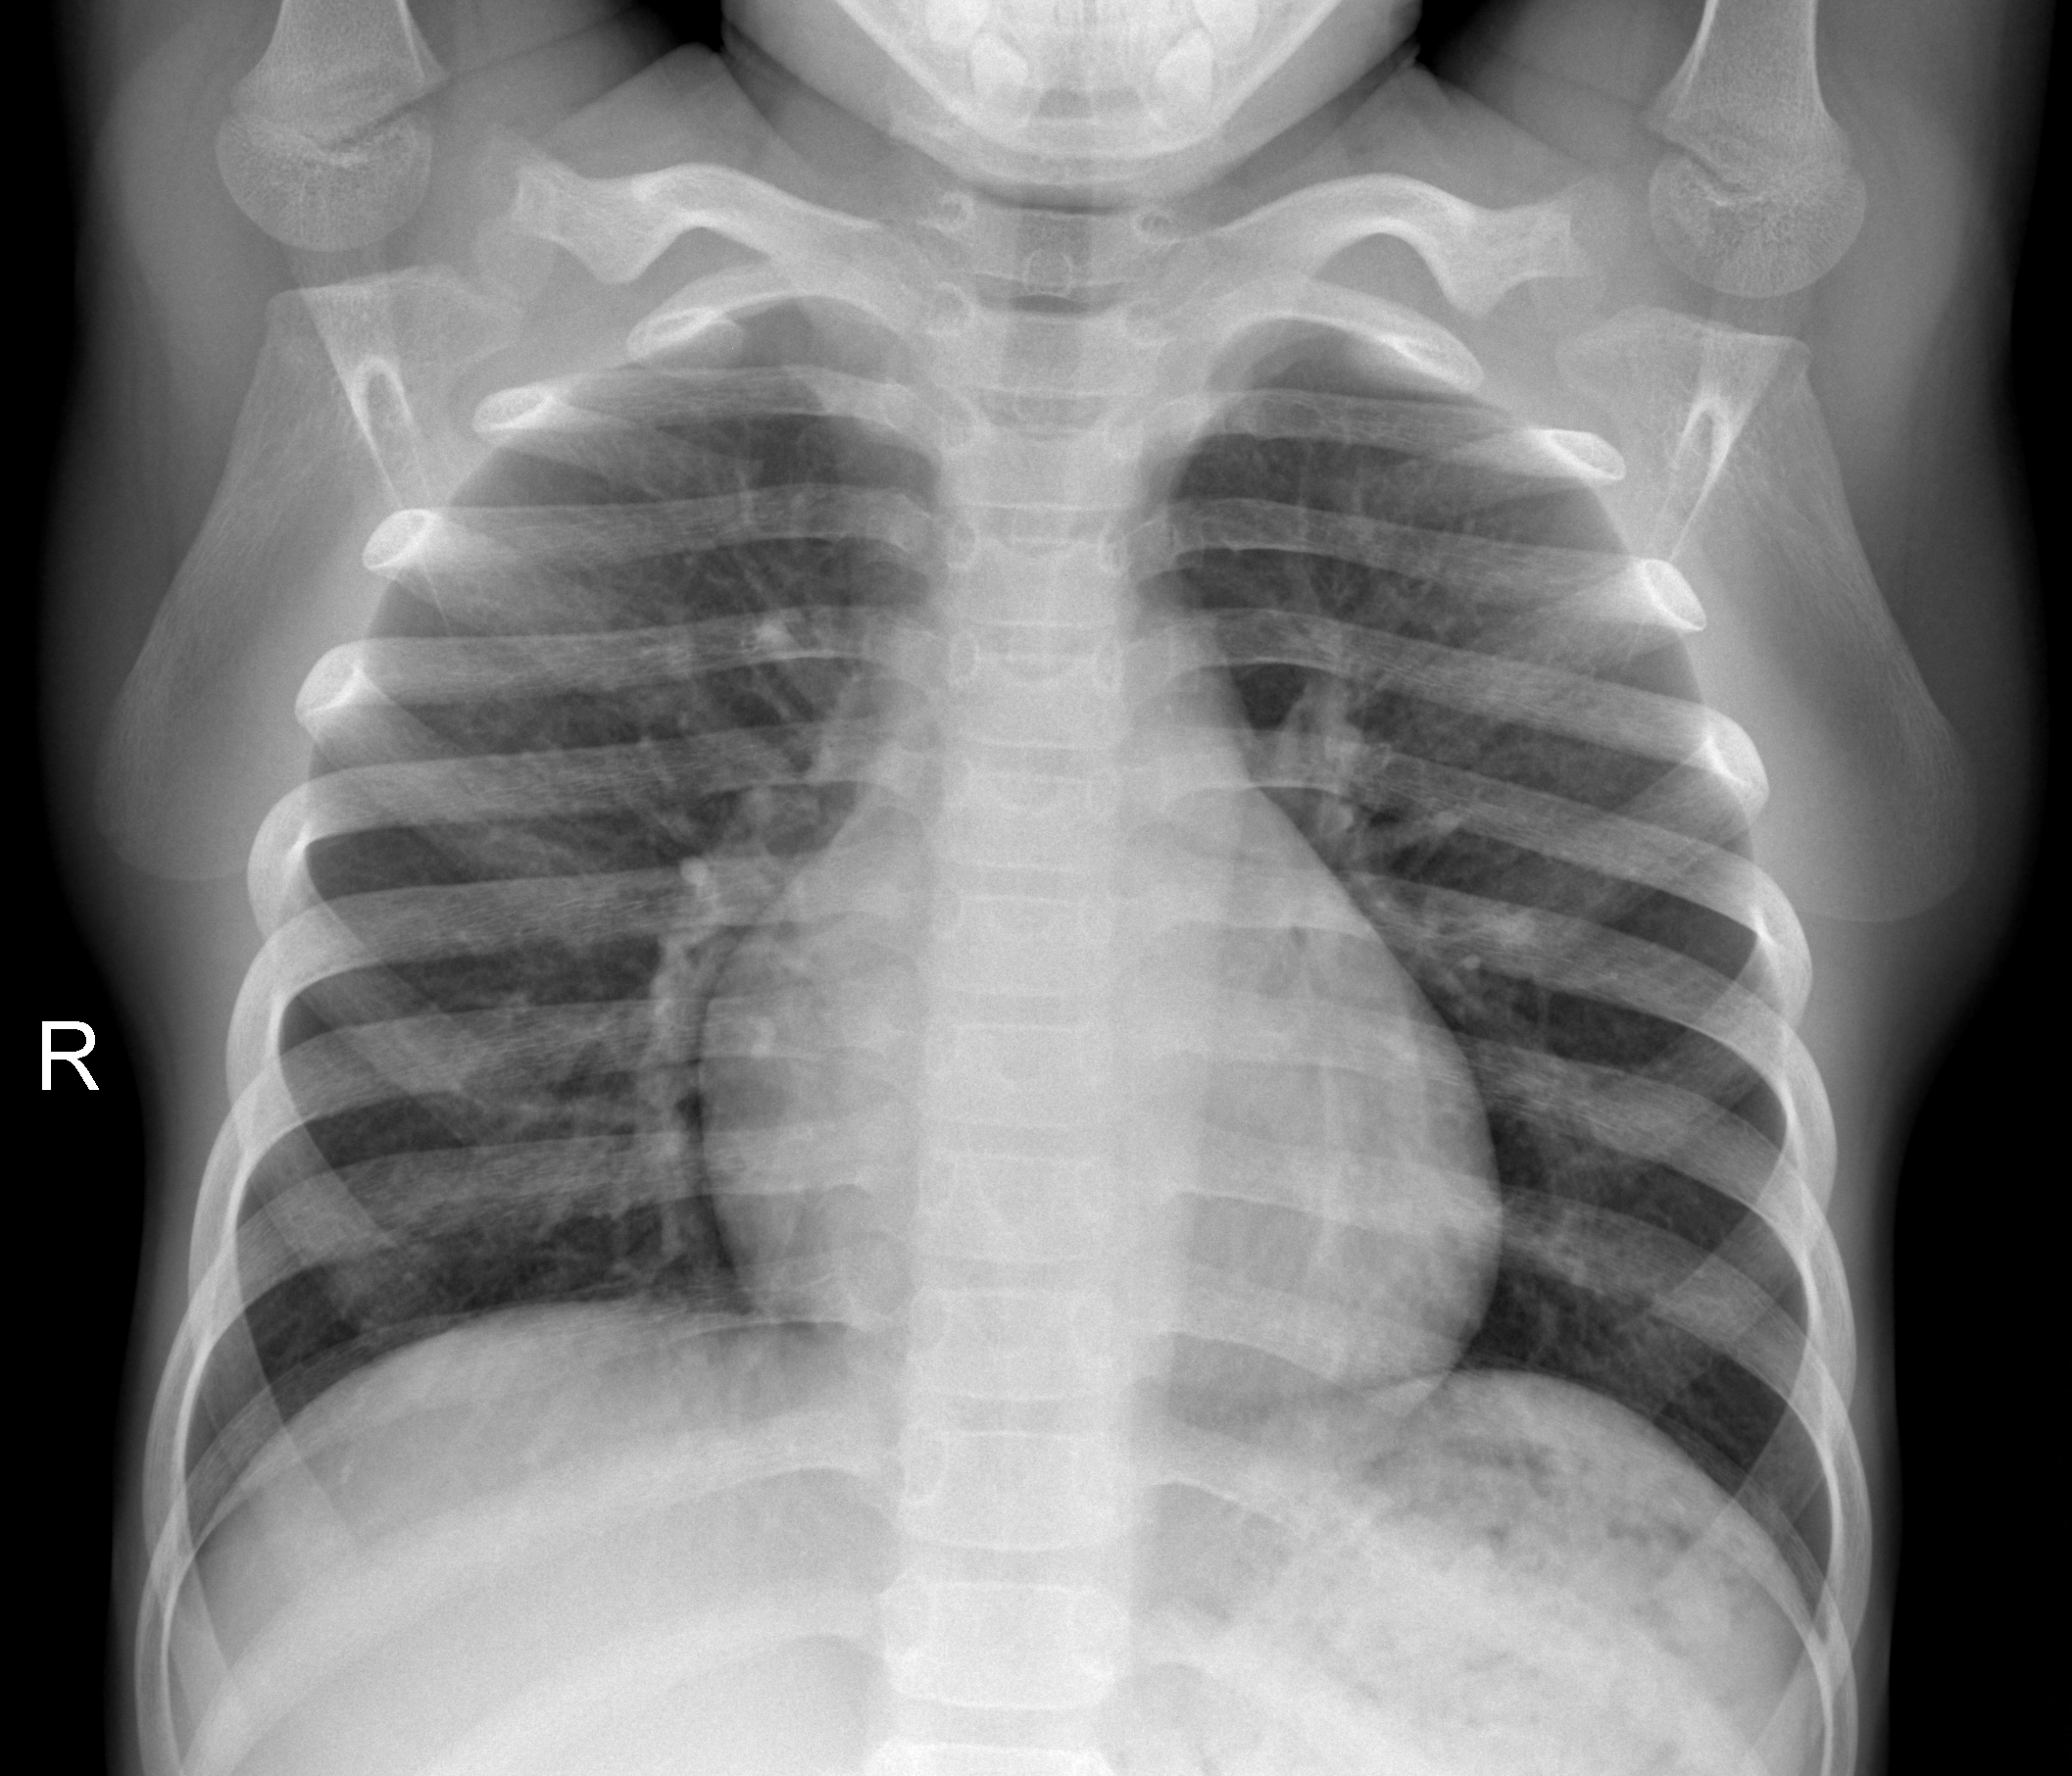

In [91]:
rgbimg

In [101]:
# preprocess image
torch_img = transforms.Compose([
   
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])(rgbimg).to(device)


normed_torch_img = transforms.Normalize([0.5], [0.5])(torch_img)[None]

#normed_torch_img  = normed_torch_img[:3]



In [62]:
torch_img.size()

torch.Size([3, 224, 224])

In [63]:
normed_torch_img.size()

torch.Size([1, 3, 224, 224])

In [14]:
resnet101 = models.resnet101(pretrained=True)
resnet50 = models.resnet50(pretrained=True)
vgg19 = models.vgg19_bn(pretrained=True)
vgg16 = models.vgg16_bn(pretrained=True)
alexnet = models.alexnet(pretrained=True)




In [64]:
configs = [
    dict(model_type='resnet', arch=resnet101, layer_name='layer4'),
    dict(model_type='resnet', arch=resnet50, layer_name='layer4'),
    dict(model_type='vgg', arch=vgg19, layer_name='features_29'),
    dict(model_type='vgg', arch=vgg16, layer_name='features_29'),
    dict(model_type='alexnet', arch=alexnet, layer_name='features_11')
    
]

In [82]:
for config in configs:
    config['arch'].to(device).eval()


In [83]:
cams = [
    [cls.from_config(**config) for cls in (GradCAM, GradCAMpp)]
    for config in configs
]

In [102]:
images = []
for gradcam, gradcam_pp in cams:
    mask, _ = gradcam(normed_torch_img)
    heatmap, result = visualize_cam(mask, torch_img)

    mask_pp, _ = gradcam_pp(normed_torch_img)
    heatmap_pp, result_pp = visualize_cam(mask_pp, torch_img)
    
    images.extend([torch_img.cpu(), result, result_pp])
    
grid_image = make_grid(images, nrow=3)

In [103]:
final = transforms.ToPILImage()(grid_image)

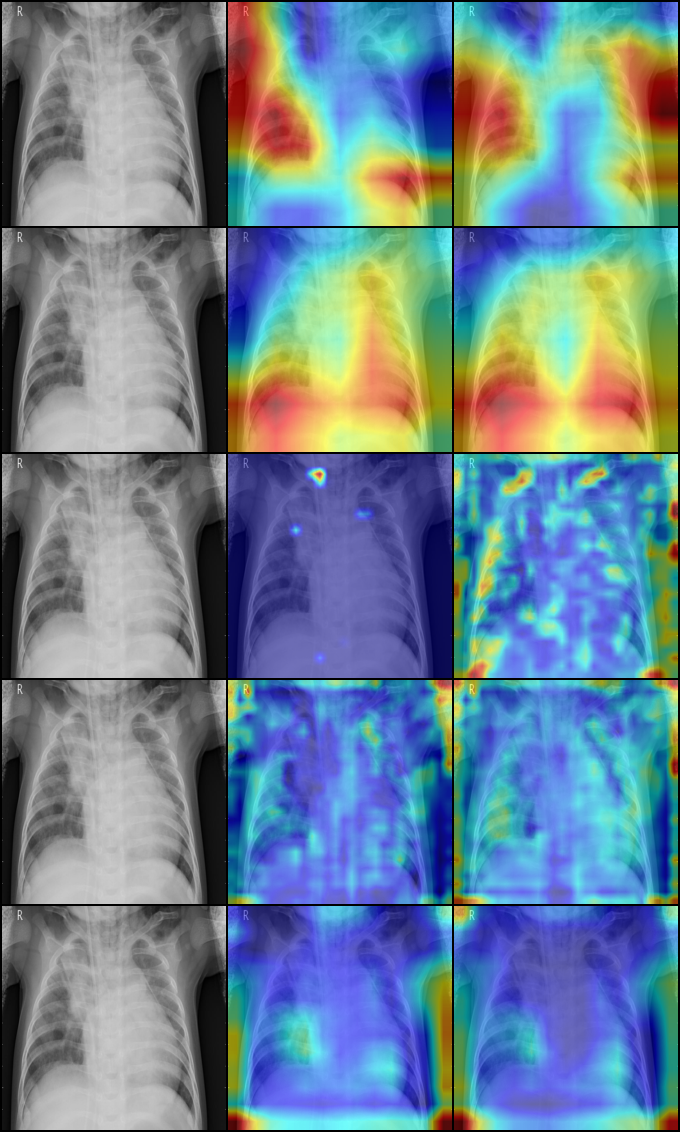

In [104]:
final


In [105]:
final.save("final.jpeg")